In [28]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df = pd.read_csv('sea_level1.txt')

In [30]:
df.head()


,First,Altimeter,Mergedfilecy,Yearfractionyear,Numofobserv,GMSL,SDofGMSL,SDofGMSLVE,Smooth_Gmsl,GMSL20year,SD_GSML,gmsl,gmsl(annu_semi_removed),Unnamed: 13
0,NaN,0,11,1993.011526,466462,337277.00,-37.24,92.66,-37.02,-37.24,92.66,-37.02,-37.55,NaN
1,NaN,0,12,1993.038692,460889,334037.31,-40.35,95.39,-38.20,-40.34,95.39,-38.19,-38.06,NaN
2,NaN,0,13,1993.065858,472123,342416.09,-40.17,92.29,-38.28,-40.16,92.29,-38.27,-37.60,NaN
3,NaN,0,14,1993.093025,421377,306050.59,-41.92,96.20,-38.56,-41.89,96.19,-38.54,-37.45,NaN
4,NaN,0,15,1993.120191,459548,331094.09,-36.89,94.64,-37.87,-36.85,94.63,-37.83,-36.44,NaN


In [31]:
df.to_csv('sea_leavel.csv',sep=',')

In [32]:
df.head()

,First,Altimeter,Mergedfilecy,Yearfractionyear,Numofobserv,GMSL,SDofGMSL,SDofGMSLVE,Smooth_Gmsl,GMSL20year,SD_GSML,gmsl,gmsl(annu_semi_removed),Unnamed: 13
0,NaN,0,11,1993.011526,466462,337277.00,-37.24,92.66,-37.02,-37.24,92.66,-37.02,-37.55,NaN
1,NaN,0,12,1993.038692,460889,334037.31,-40.35,95.39,-38.20,-40.34,95.39,-38.19,-38.06,NaN
2,NaN,0,13,1993.065858,472123,342416.09,-40.17,92.29,-38.28,-40.16,92.29,-38.27,-37.60,NaN
3,NaN,0,14,1993.093025,421377,306050.59,-41.92,96.20,-38.56,-41.89,96.19,-38.54,-37.45,NaN
4,NaN,0,15,1993.120191,459548,331094.09,-36.89,94.64,-37.87,-36.85,94.63,-37.83,-36.44,NaN


In [33]:
df=df.drop(columns=['First','Altimeter','Mergedfilecy','Numofobserv','GMSL','SDofGMSL','SDofGMSL','Smooth_Gmsl','GMSL20year','SD_GSML','gmsl','Unnamed: 13'])

In [34]:
df.head()

,Yearfractionyear,SDofGMSLVE,gmsl(annu_semi_removed)
0,1993.011526,92.66,-37.55
1,1993.038692,95.39,-38.06
2,1993.065858,92.29,-37.60
3,1993.093025,96.20,-37.45
4,1993.120191,94.64,-36.44


In [35]:
df = df.rename(columns={'Yearfractionyear': 'Year and Fraction of Year', 'SDofGMSLVE': 'Standard Deviation of GSML','gmsl(annu_semi_removed)':'Global Mean Sea Level'})

In [36]:
df.head()

,Year and Fraction of Year,Standard Deviation of GSML,Global Mean Sea Level
0,1993.011526,92.66,-37.55
1,1993.038692,95.39,-38.06
2,1993.065858,92.29,-37.60
3,1993.093025,96.20,-37.45
4,1993.120191,94.64,-36.44


In [37]:
print(df.dtypes)

Year and Fraction of Year     float64
Standard Deviation of GSML    float64
Global Mean Sea Level         float64
dtype: object


In [38]:
df['Year and Fraction of Year'] = df['Year and Fraction of Year'].astype(str)

In [39]:
df['YEAR'], df['Fraction of the Year']=df['Year and Fraction of Year'].str.split('.',1).str


In [40]:
df.head()

,Year and Fraction of Year,Standard Deviation of GSML,Global Mean Sea Level,YEAR,Fraction of the Year
0,1993.0115260000002,92.66,-37.55,1993,0115260000002
1,1993.038692,95.39,-38.06,1993,038692
2,1993.065858,92.29,-37.60,1993,065858
3,1993.093025,96.20,-37.45,1993,093025
4,1993.120191,94.64,-36.44,1993,120191


In [41]:
temp_df=df[['YEAR','Global Mean Sea Level']]

In [42]:
temp_df.head()

,YEAR,Global Mean Sea Level
0,1993,-37.55
1,1993,-38.06
2,1993,-37.60
3,1993,-37.45
4,1993,-36.44


In [43]:
#Group by date and find mean
groupby_year = temp_df.groupby("YEAR")
mean_agg = groupby_year["Global Mean Sea Level"].mean()
Final_df = mean_agg.to_frame()
Final_df = Final_df.reset_index()
#Final_df=Final_df.drop("index",axis=1)
Final_df
Final_df.to_csv('temp.csv', index=False)

In [44]:
#Final_df.columns = Final_df.columns.to_series().apply(lambda x: x.strip())
Final_df = pd.read_csv('temp.csv')
Final_df.head()

,YEAR,Global Mean Sea Level
0,1993,-33.767838
1,1994,-29.650000
2,1995,-25.971892
3,1996,-23.606389
4,1997,-20.116757


Text(0, 0.5, 'Global Mean Sea Level')

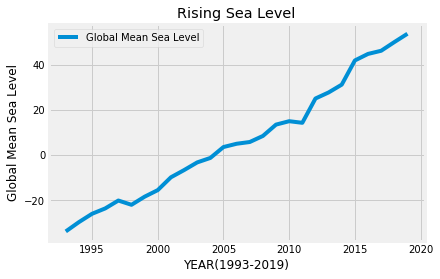

In [45]:
ax=Final_df.plot(x ='YEAR', y='Global Mean Sea Level', kind = 'line',title="Rising Sea Level")
#ax=Final_df.plot(title="Rising Sea Level")
ax.set_xlabel("YEAR(1993-2019)")
ax.set_ylabel("Global Mean Sea Level")


Text(0, 0.5, 'Global Mean Sea Level')

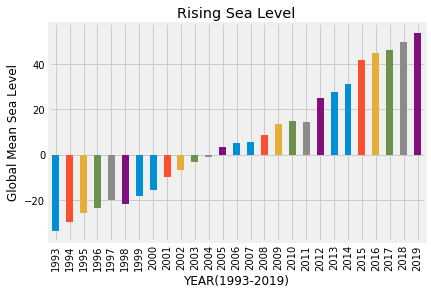

In [27]:
ax=Final_df.groupby("YEAR")['Global Mean Sea Level'].mean().plot(kind='bar',title="Rising Sea Level")
ax.set_xlabel("YEAR(1993-2019)")
ax.set_ylabel("Global Mean Sea Level")